# I. Probability

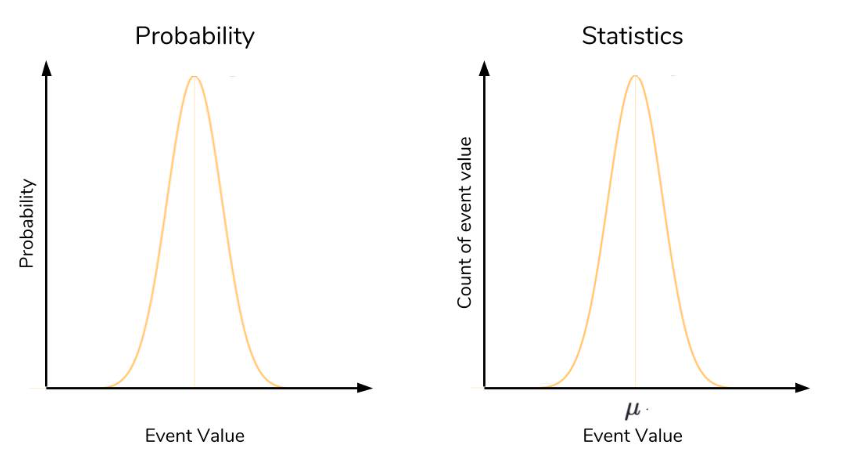
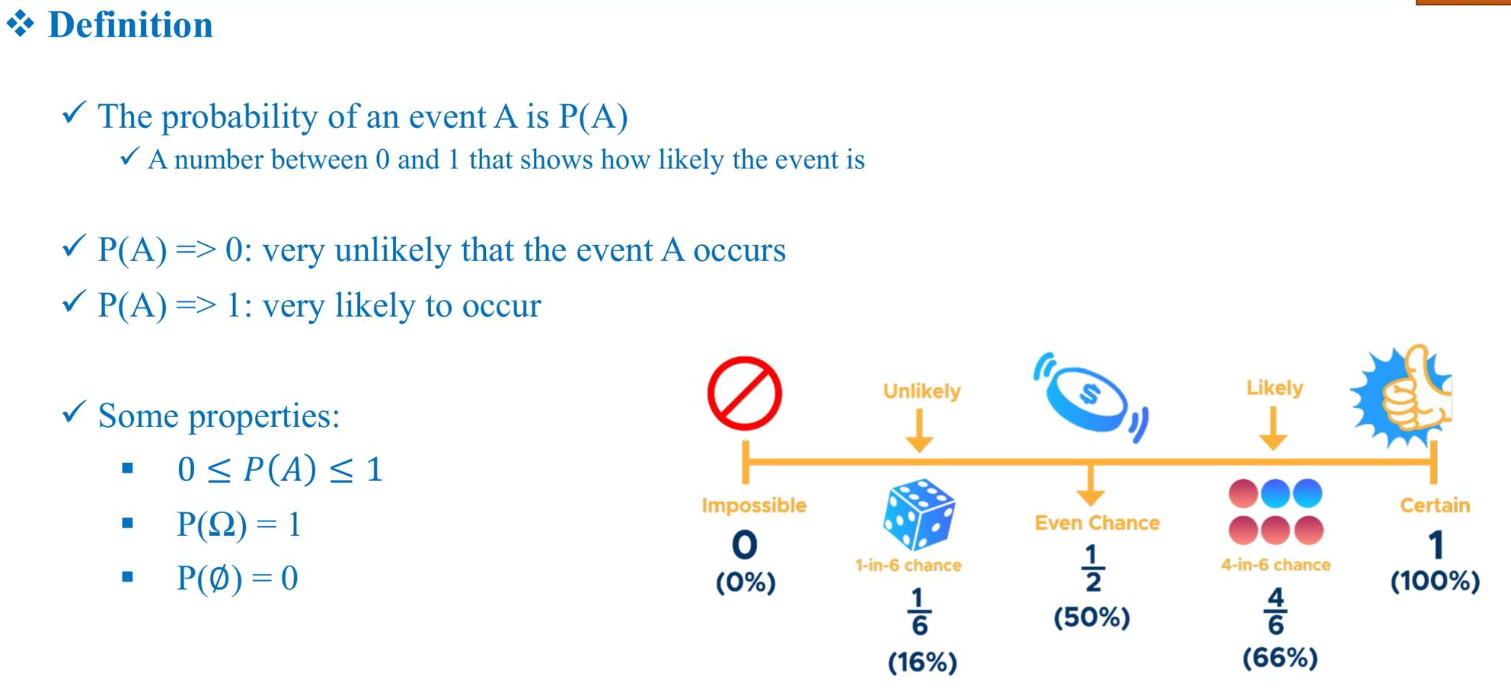
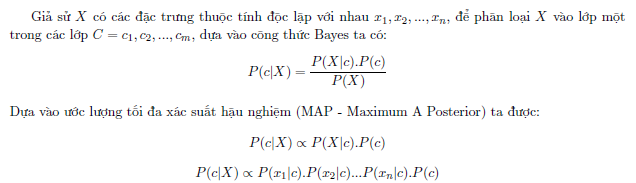
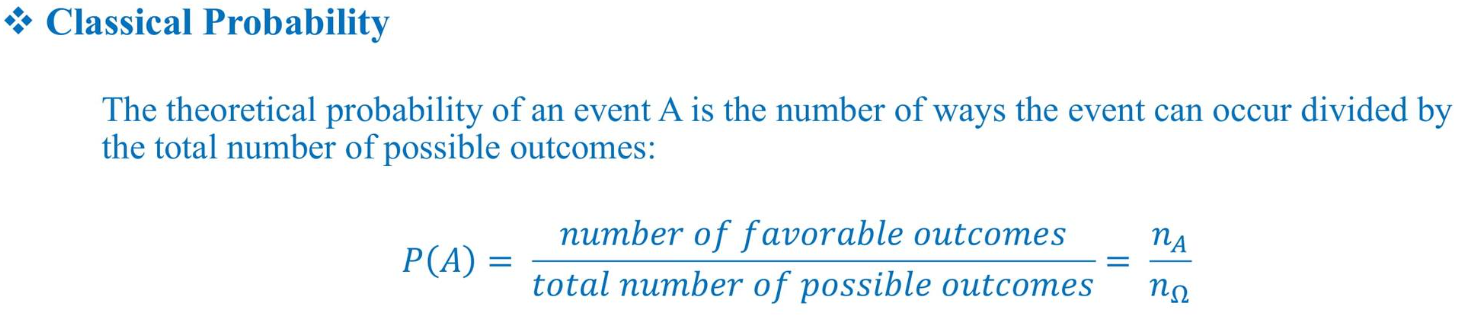
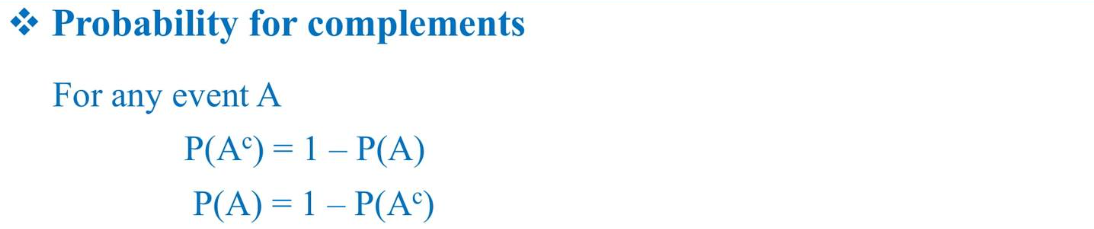
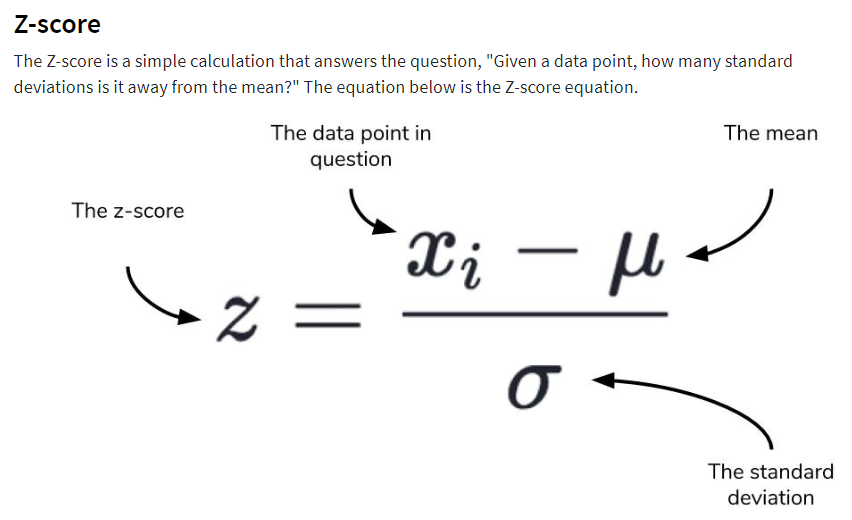
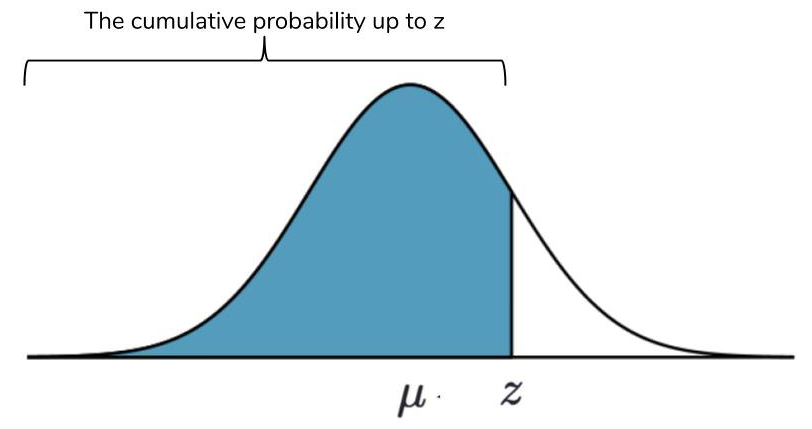
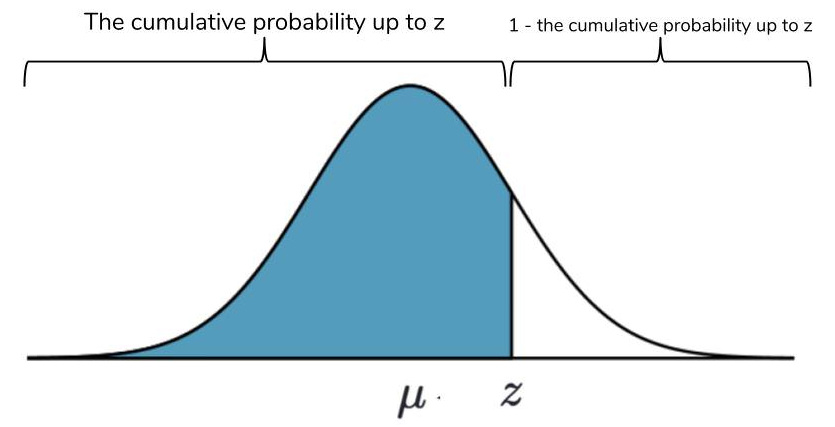

### Three Sigma Rule
The Three Sigma rule, also known as the empirical rule or 68-95-99.7 rule, is an expression of how many of our observations fall within a certain distance of the mean. Remember that the standard deviation (a.k.a. "sigma") is the average distance an observation in the data set is from the mean. The Three Sigma rule dictates that given a normal distribution, 68% of your observations will fall between one standard deviation of the mean. 95% will fall within two, and 99.7% will fall within three. A lot of complicated math goes into the derivation of these values, and as such, is out of the scope of this article. The key takeaway is to know that the Three Sigma Rule enables us to know how much data is contained under different intervals of a normal distribution. 

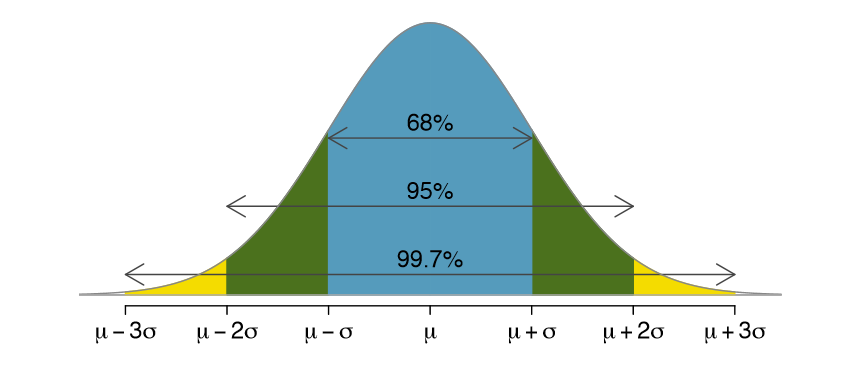

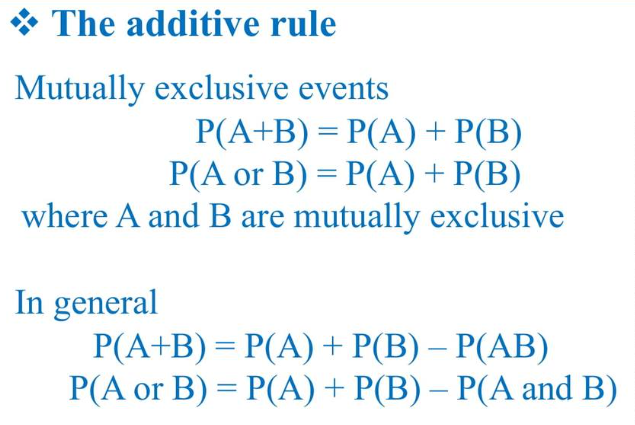
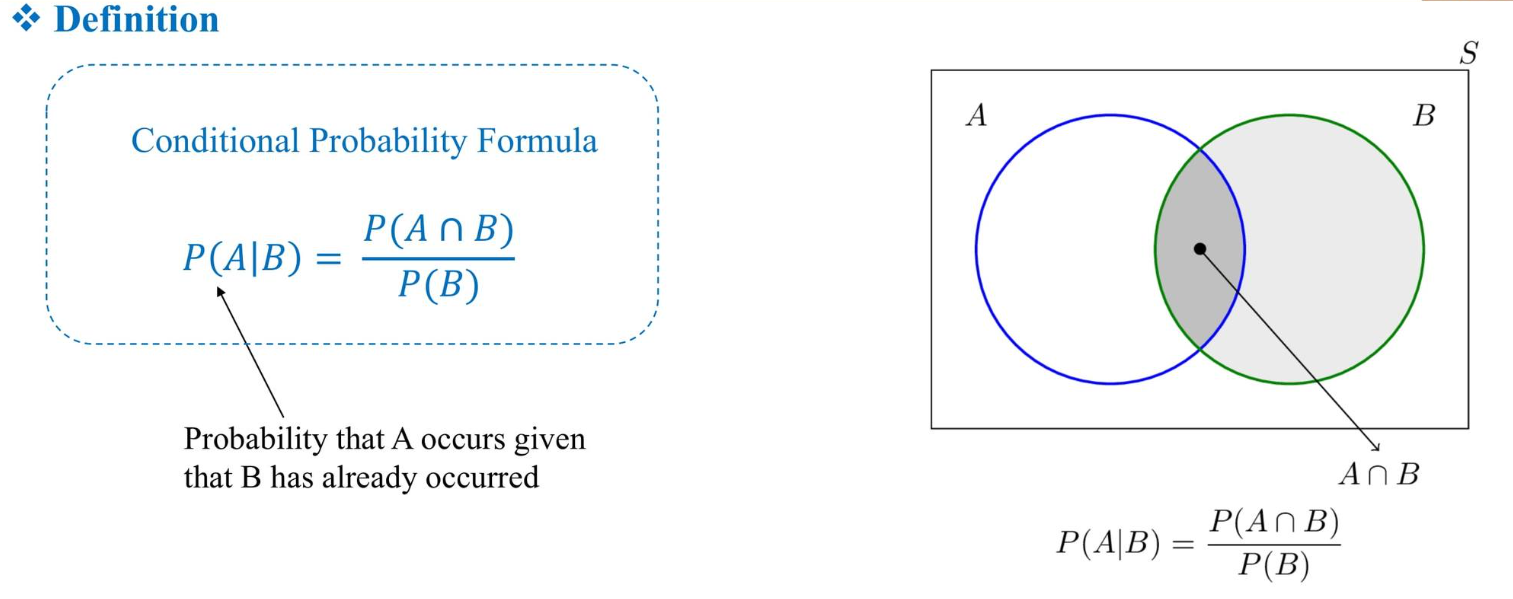
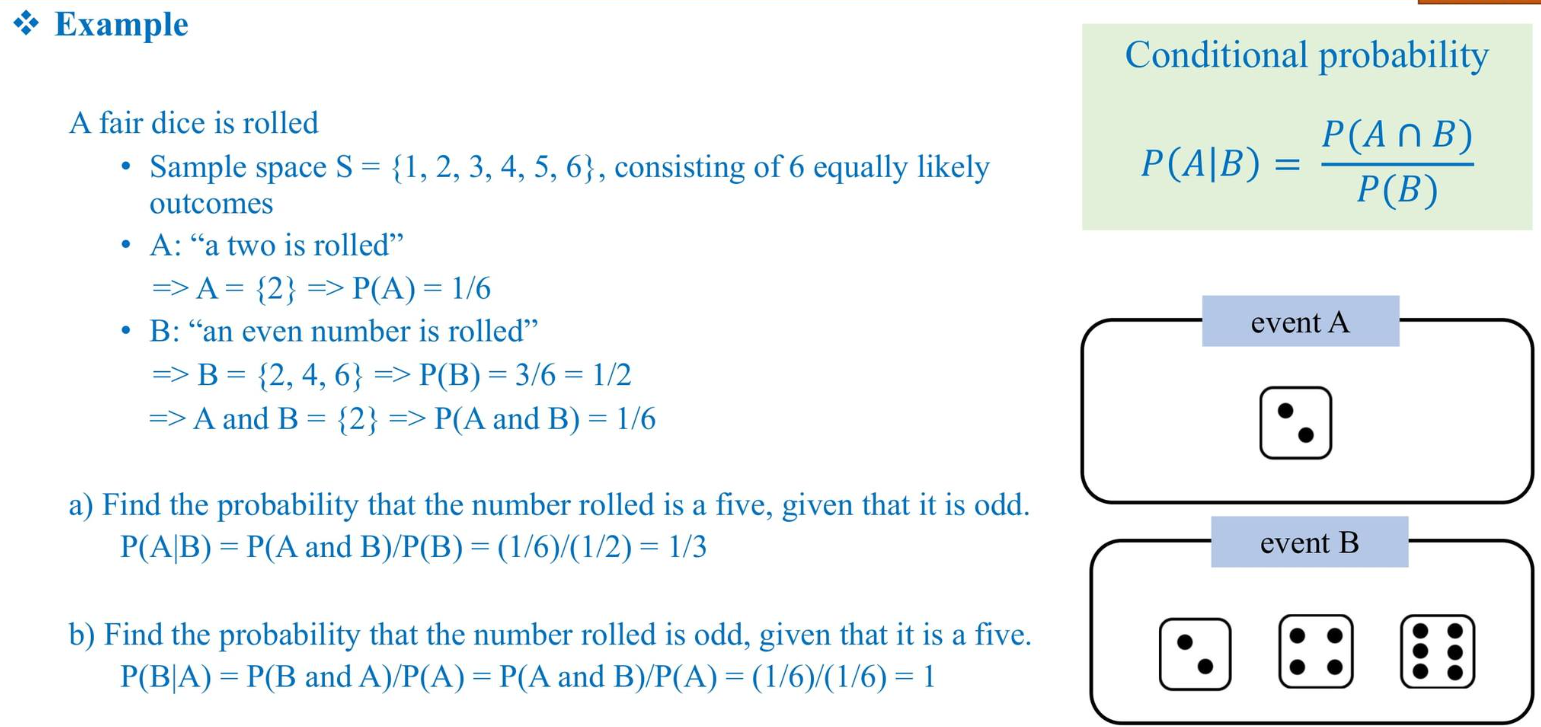
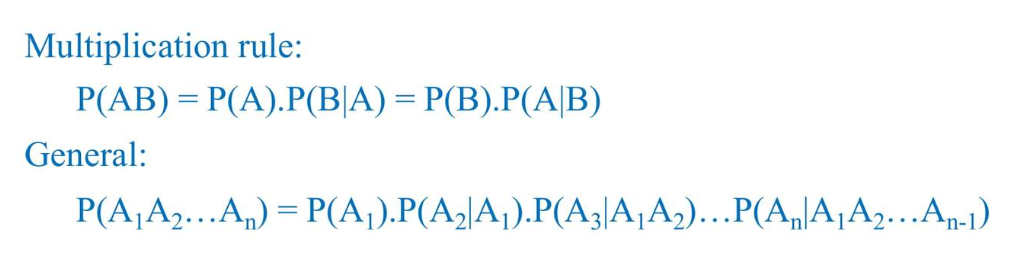
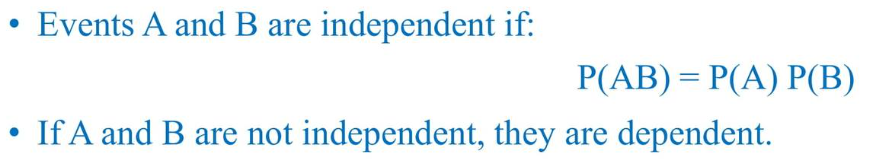

# II. Implementation

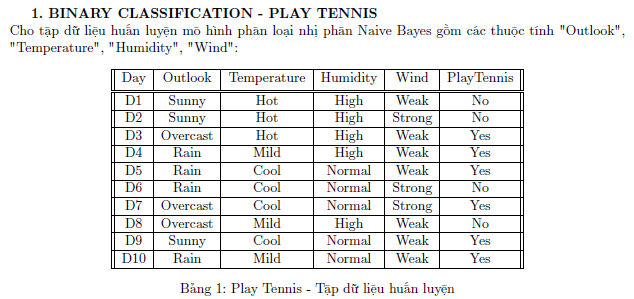

### **Experiments**: X = (Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong)

In [1]:
import pandas as pd

# Create the dataframe from the provided table
data = {
    "Day": ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10"],
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Overcast", "Sunny", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak"],
    "PlayTennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes"]
}

df = pd.DataFrame(data)

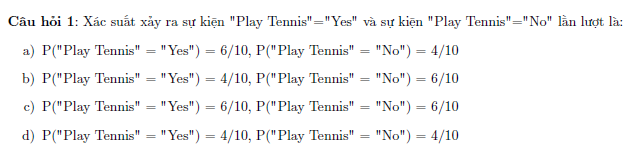

In [2]:
P_tennis_yes = len(df[df["PlayTennis"] == "Yes"])/len(df)
P_tennis_no = len(df[df["PlayTennis"] == "No"])/len(df)
print("P_tennis_yes: " + str(P_tennis_yes))
print("P_tennis_no: " + str(P_tennis_no))

P_tennis_yes: 0.6
P_tennis_no: 0.4


### Question 1: A

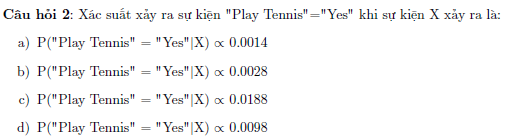

In [10]:
P_Outlook_Sunny = len(df[df["Outlook"] == "Sunny"]) / len(df)
P_Temperature_Cool = len(df[df["Temperature"] == "Cool"]) / len(df)
P_Humidity_High = len(df[df["Humidity"] == "High"]) / len(df)
P_Wind_Strong = len(df[df["Wind"] == "Strong"]) / len(df)

# Calculate the joint probability P(X)
P_X = P_Outlook_Sunny * P_Temperature_Cool * P_Humidity_High * P_Wind_Strong

P_Play_Tennis_Intersection_X = len(df[((df["Outlook"] == "Sunny") | 
                                      (df["Temperature"] == "Cool") | 
                                      (df["Humidity"] == "High") | 
                                      (df["Wind"] == "Strong")) & 
                                      (df["PlayTennis"] == "Yes")]) / len(df)

P_Play_Tennis_occur_given_X = P_Play_Tennis_Intersection_X / P_X

print("P(Outlook = Sunny): {:.4f}".format(P_Outlook_Sunny))
print("P(Temperature = Cool): {:.4f}".format(P_Temperature_Cool))
print("P(Humidity = High): {:.4f}".format(P_Humidity_High))
print("P(Wind = Strong): {:.4f}".format(P_Wind_Strong))
print("P(X): {:.4f}".format(P_X))
print("P(PlayTennis = Yes | X): {:.4f}".format(P_Play_Tennis_occur_given_X/100))

P(Outlook = Sunny): 0.3000
P(Temperature = Cool): 0.4000
P(Humidity = High): 0.5000
P(Wind = Strong): 0.3000
P(X): 0.0180
P(PlayTennis = Yes | X): 0.2778


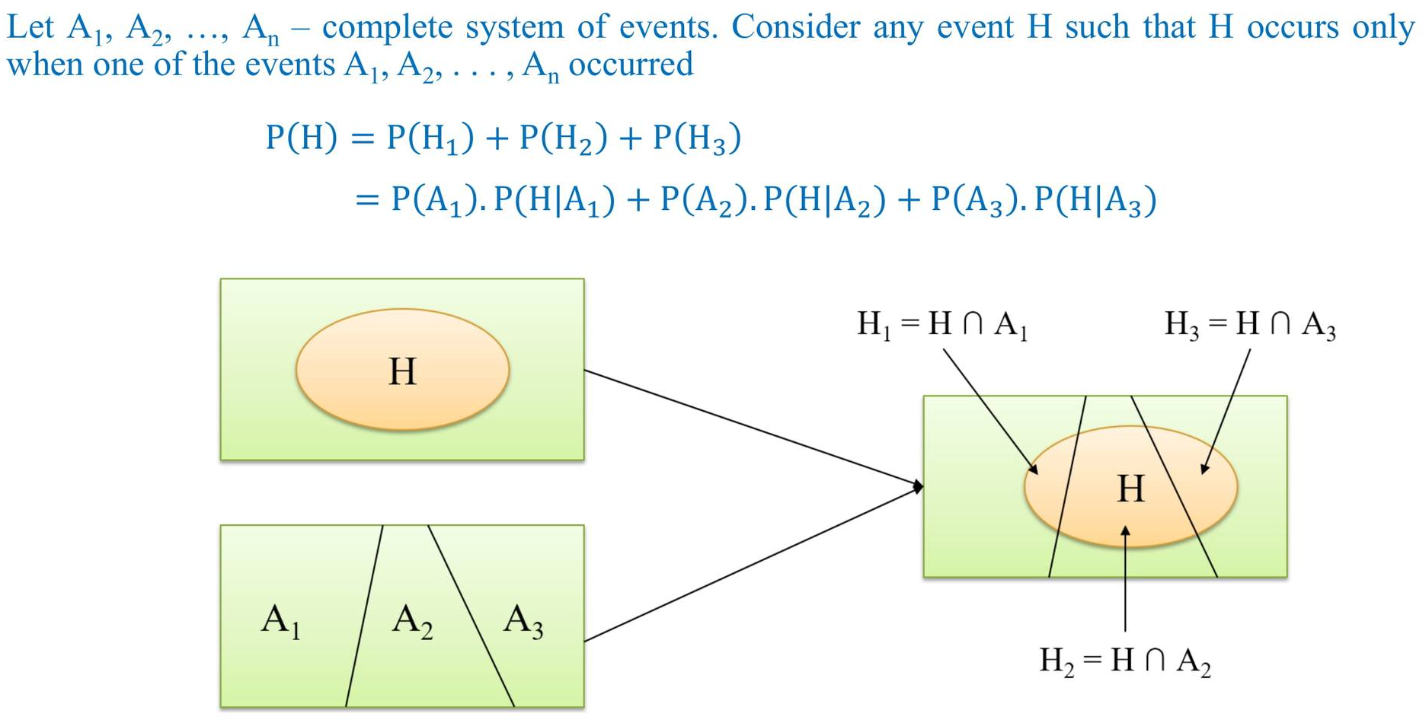
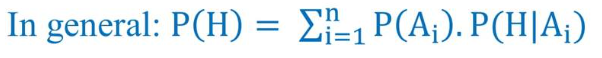
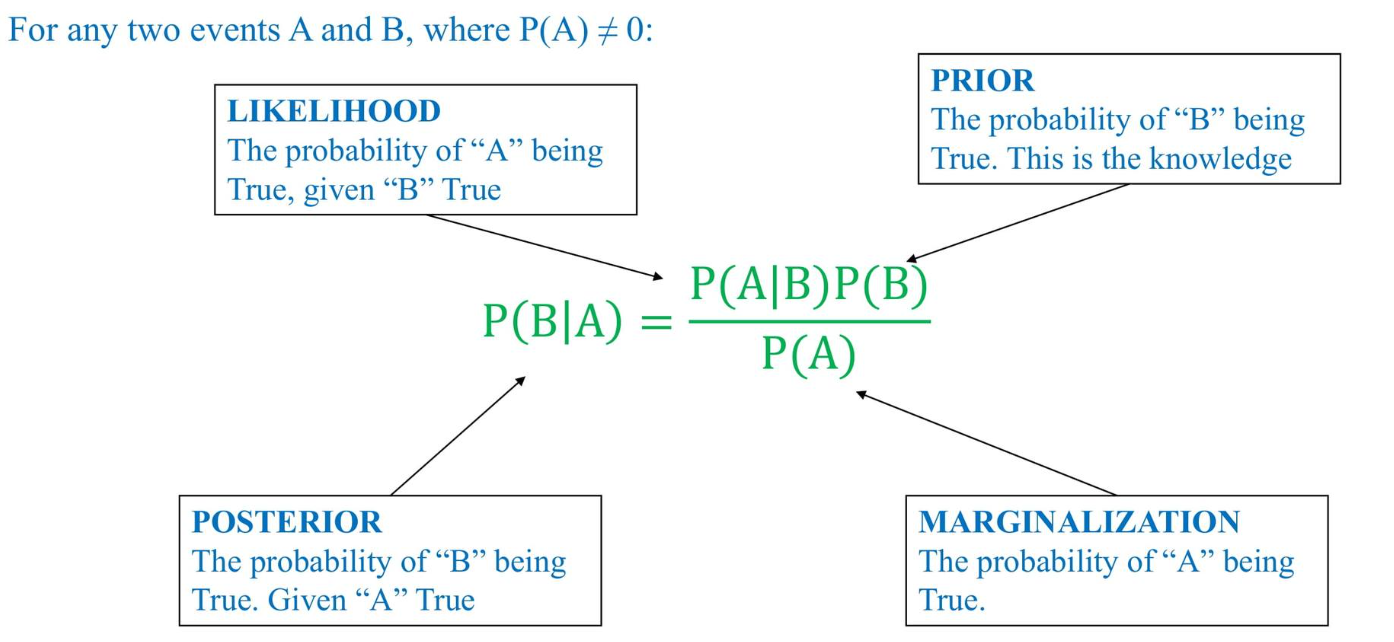
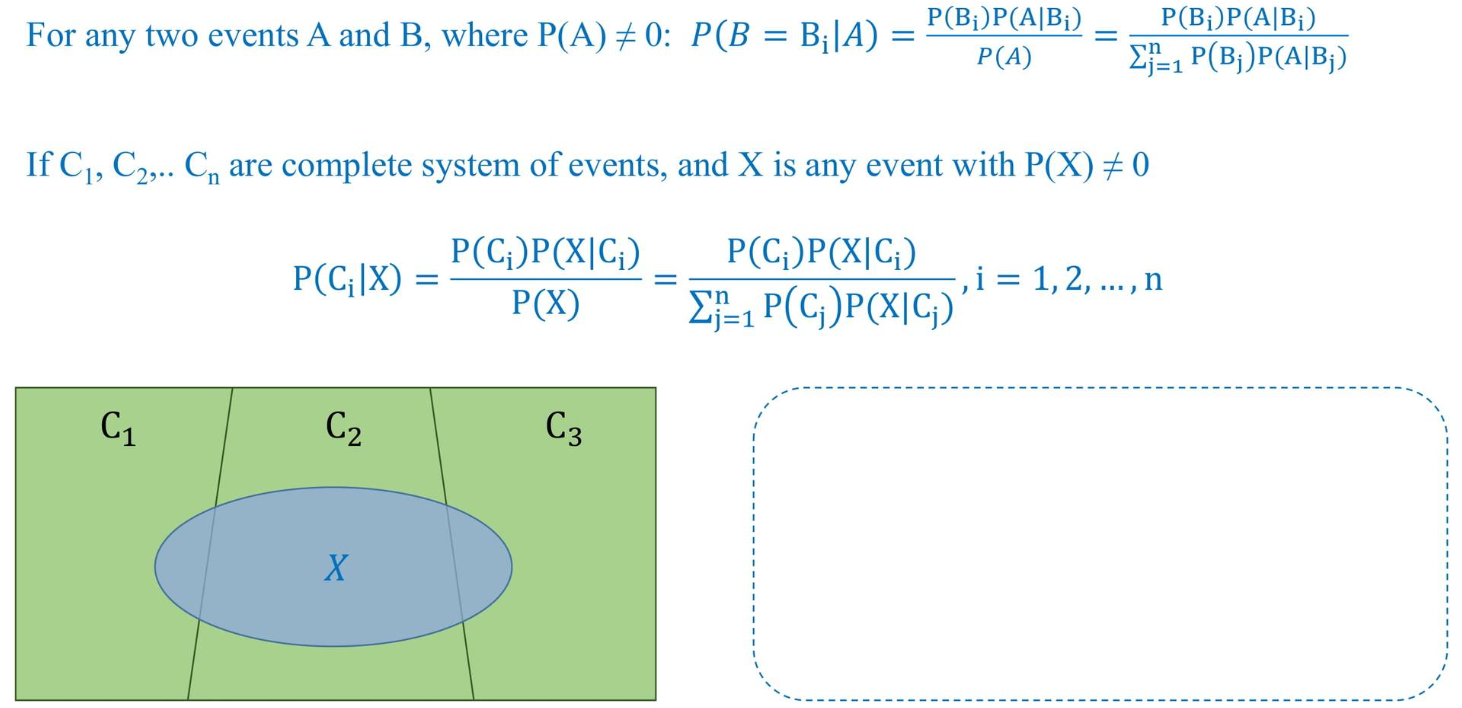
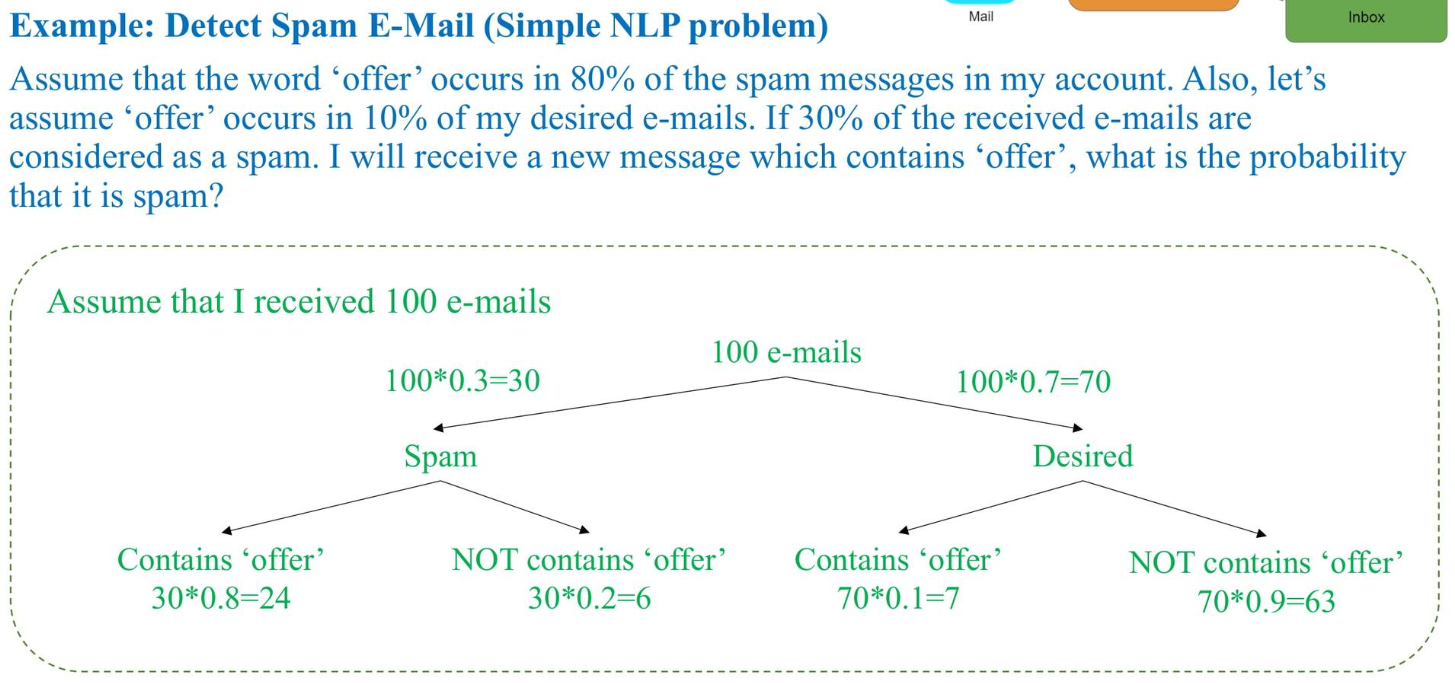
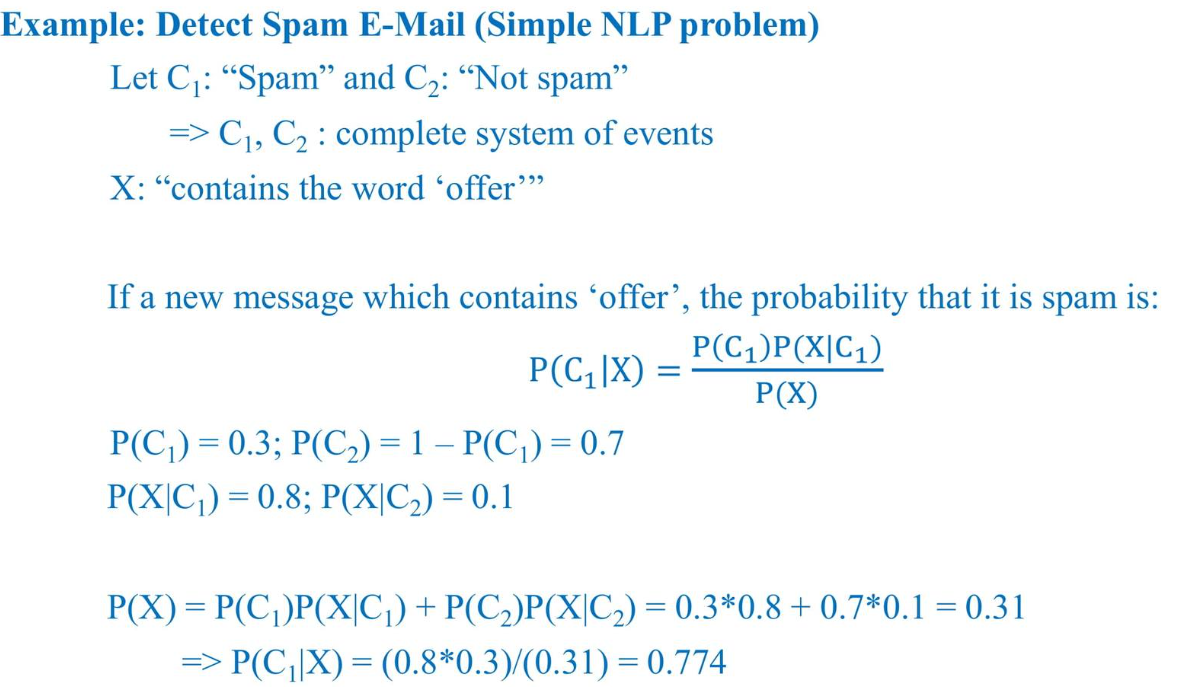

In [ ]:
from __future__ import division, print_function
import numpy as np
import math
from mlfromscratch.utils import train_test_split, normalize
from mlfromscratch.utils import Plot, accuracy_score

class NaiveBayes():
    """The Gaussian Naive Bayes classifier. """
    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            # Only select the rows where the label equals the given class
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            # Add the mean and variance for each feature (column)
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        """ Gaussian likelihood of the data x given mean and var """
        eps = 1e-4 # Added in denominator to prevent division by zero
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        """ Calculate the prior of class c
        (samples where class == c / total number of samples)"""
        frequency = np.mean(self.y == c)
        return frequency

    def _classify(self, sample):
        """ Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
            or Posterior = Likelihood * Prior / Scaling Factor

        P(Y|X) - The posterior is the probability that sample x is of class y given the
                 feature values of x being distributed according to distribution of y and the prior.
        P(X|Y) - Likelihood of data X given class distribution Y.
                 Gaussian distribution (given by _calculate_likelihood)
        P(Y)   - Prior (given by _calculate_prior)
        P(X)   - Scales the posterior to make it a proper probability distribution.
                 This term is ignored in this implementation since it doesn't affect
                 which class distribution the sample is most likely to belong to.

        Classifies the sample as the class that results in the largest P(Y|X) (posterior)
        """
        posteriors = []
        # Go through list of classes
        for i, c in enumerate(self.classes):
            # Initialize posterior as prior
            posterior = self._calculate_prior(c)
            # Naive assumption (independence):
            # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
            # Posterior is product of prior and likelihoods (ignoring scaling factor)
            for feature_value, params in zip(sample, self.parameters[i]):
                # Likelihood of feature value given distribution of feature values given y
                likelihood = self._calculate_likelihood(params["mean"], params["var"], feature_value)
                posterior *= likelihood
            posteriors.append(posterior)
        # Return the class with the largest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """ Predict the class labels of the samples in X """
        y_pred = [self._classify(sample) for sample in X]
        return y_pred

In [5]:
!pip install polars
!pip install -U scikit-learn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 5.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.0 MB 8.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.0 MB 9.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/11.0 MB 10.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 10.5 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.0 MB 10.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/11.0 MB 11.1 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.0 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 11.3 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.0 MB 11.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.9/11.0 MB 11.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.5/11.0 MB 11.5 MB/s eta 0:00:


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import polars as pl

# Create the dataframe from the provided table
data = {
    "Day": ["Weekday", "Weekday", "Weekday", "Holiday", "Saturday", "Weekday", "Holiday", "Sunday", "Weekday", "Weekday", 
            "Saturday", "Weekday", "Weekday", "Weekday", "Weekday", "Saturday", "Weekday", "Holiday", "Weekday", "Weekday"],
    "Season": ["Spring", "Winter", "Winter", "Winter", "Summer", "Autumn", "Summer", "Summer", "Winter", "Summer", 
               "Spring", "Summer", "Winter", "Summer", "Winter", "Autumn", "Autumn", "Spring", "Spring", "Spring"],
    "Fog": ["None", "None", "None", "High", "Normal", "Normal", "High", "Normal", "High", "None", 
            "High", "High", "Normal", "High", "Normal", "High", "None", "Normal", "Normal", "Normal"],
    "Rain": ["None", "Slight", "None", "Slight", "None", "None", "Slight", "None", "Heavy", "Slight", 
             "Heavy", "Slight", "None", "None", "Heavy", "Slight", "Heavy", "Slight", "None", "Heavy"],
    "Class": ["On Time", "On Time", "On Time", "Late", "On Time", "Very Late", "On Time", "On Time", "Very Late", "On Time", 
              "Cancelled", "On Time", "Late", "On Time", "Very Late", "On Time", "On Time", "On Time", "On Time", "On Time"]
}

df_polars = pl.DataFrame(data)

In [17]:
display(df_polars.to_pandas())

Day  Season     Fog    Rain      Class
0    Weekday  Spring    None    None    On Time
1    Weekday  Winter    None  Slight    On Time
2    Weekday  Winter    None    None    On Time
3    Holiday  Winter    High  Slight       Late
4   Saturday  Summer  Normal    None    On Time
5    Weekday  Autumn  Normal    None  Very Late
6    Holiday  Summer    High  Slight    On Time
7     Sunday  Summer  Normal    None    On Time
8    Weekday  Winter    High   Heavy  Very Late
9    Weekday  Summer    None  Slight    On Time
10  Saturday  Spring    High   Heavy  Cancelled
11   Weekday  Summer    High  Slight    On Time
12   Weekday  Winter  Normal    None       Late
13   Weekday  Summer    High    None    On Time
14   Weekday  Winter  Normal   Heavy  Very Late
15  Saturday  Autumn    High  Slight    On Time
16   Weekday  Autumn    None   Heavy    On Time
17   Holiday  Spring  Normal  Slight    On Time
18   Weekday  Spring  Normal    None    On Time
19   Weekday  Spring  Normal   Heavy    On Time

In [7]:
import polars as pl
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical values using LabelEncoder
le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()

df_polars = df_polars.with_columns([
    pl.Series("Outlook", le_outlook.fit_transform(df_polars["Outlook"])),
    pl.Series("Temperature", le_temperature.fit_transform(df_polars["Temperature"])),
    pl.Series("Humidity", le_humidity.fit_transform(df_polars["Humidity"])),
    pl.Series("Wind", le_wind.fit_transform(df_polars["Wind"])),
])

# Extracting the features and labels
X_train = df_polars.select(["Outlook", "Temperature", "Humidity", "Wind"]).to_numpy()
y_train = le_outlook.fit_transform(df_polars["PlayTennis"])

# Print the transformed features
print(X_train)

[[2 1 0 1]
 [2 1 0 0]
 [0 1 0 1]
 [1 2 0 1]
 [1 0 1 1]
 [1 0 1 0]
 [0 0 1 0]
 [0 2 0 1]
 [2 0 1 1]
 [1 2 1 1]]


In [ ]:
model = NaiveBayes()